In [21]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_histogram,
    theme_bw,
    labs,
    geom_point,
    scale_color_brewer,
    facet_wrap,
    geom_smooth,
    theme,
    scale_y_log10,
    facet_grid,
)
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
try:
    from ydata_profiling import ProfileReport
except AttributeError:
    pass
pd.options.mode.chained_assignment = None
pd.set_option("display.float_format", lambda x: "%.2f" % x)
plt.style.use('ggplot')

In [22]:
df = pd.read_csv("../data/full_data.csv", index_col="SEQN")

# raw data cleaning steps; handle missing
df["KIQ026"] = 0 or df["KIQ026"] == 1


def max_val_null(x, max_val):
    return np.where(x >= max_val, np.nan, x)


df["ALQ130"] = max_val_null(df["ALQ130"], 16)
df["PAD660"] = max_val_null(df["PAD660"], 7777)
df["PAD675"] = max_val_null(df["PAD675"], 7777)
df["PAD680"] = max_val_null(df["PAD680"], 7777)
df["PAQ605"] = df["PAQ605"] == 1
df["PAQ620"] = df["PAQ620"] == 1
df["OCQ180"] = max_val_null(df["OCQ180"], 7777)

In [23]:
column_map = {
    "INDFMMPI": "poverty_num",
    "INDFMMPC": "poverty_cat",
    "PAQ605": "activity_vig_work",
    "PAQ620": "activity_mod_work",
    "PAQ635": "activity_walk_or_use_bike",
    "PAD645": "activity_minutes_walk_bike",
    "PAD660": "activity_vig_min",
    "PAD675": "activity_mod_min",
    "PAD680": "activity_sed_min",
    "DSQTCAFF": "caffeine_sup_mg",
    "DR1ICAFF": "caffeine_intake1_mg",
    "DR2ICAFF": "caffeine_intake2_mg",
    "DR1TCAFF": "caffeine_nutrient1_mg",
    "DR2TCAFF": "caffeine_nutrient2_mg",
    "BMXBMI": "bmi_total",
    "BMXWAIST": "bmi_waist",
    "ALQ130": "alcohol_nmbr_drinks",
    "OCQ180": "occ_hours_worked",
    "OCQ670": "occ_work_shift",
    "DIQ010": "diabetes_diag",
    "DIQ050": "diabetes_insulin",
    "DIQ280": "diabetes_aic",
    "SMQ020": "smoking_100cigs",
    "SMD650": "smoking_cigs_pd",
    "KIQ026": "kidney_had_stones",
    "KIQ029": "kidney_passed_stone",
    "KIQ022": "kidney_weak_failing",
    "RIAGENDR": "demo_gender",
    "RIDRETH3": "demo_race",
    "RIDAGEYR": "demo_age",
}


# Data Cleaning Steps
df = df.rename(column_map, axis=1)
df = df[df["demo_age"] >= 18]
df.head()

SEQN
109263    False
109264    False
109265    False
109266     True
109267     True
Name: demo_age, dtype: bool

In [25]:
df[
    [
        "caffeine_sup_mg",
        "caffeine_intake1_mg",
        "caffeine_intake2_mg",
        "caffeine_nutrient1_mg",
        "caffeine_nutrient2_mg",
    ]
].round(2).describe()

KeyError: "None of [Index(['caffeine_sup_mg', 'caffeine_intake1_mg', 'caffeine_intake2_mg',\n       'caffeine_nutrient1_mg', 'caffeine_nutrient2_mg'],\n      dtype='object', name='SEQN')] are in the [index]"

In [6]:
df["any_caffeine"] = df[
    [
        "caffeine_sup_mg",
        "caffeine_intake1_mg",
        "caffeine_intake2_mg",
        "caffeine_nutrient1_mg",
        "caffeine_nutrient2_mg",
    ]
].max(axis=1)
df["any_caffeine_log"] = np.log1p(df["any_caffeine"])
df["any_caffeine"].describe().apply("{0:.0f}".format)

count    12414
mean       115
std        191
min          0
25%          3
50%         50
75%        161
max       5040
Name: any_caffeine, dtype: object

In [7]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

caffeine_intake1_mg          1.00
caffeine_intake2_mg          1.00
caffeine_sup_mg              1.00
kidney_passed_stone          0.94
diabetes_aic                 0.92
diabetes_insulin             0.91
smoking_cigs_pd              0.89
activity_minutes_walk_bike   0.86
activity_vig_min             0.84
activity_mod_min             0.75
occ_hours_worked             0.66
occ_work_shift               0.64
alcohol_nmbr_drinks          0.62
kidney_weak_failing          0.41
activity_sed_min             0.38
activity_walk_or_use_bike    0.38
smoking_100cigs              0.38
caffeine_nutrient2_mg        0.32
poverty_num                  0.21
caffeine_nutrient1_mg        0.20
any_caffeine                 0.20
any_caffeine_log             0.20
bmi_waist                    0.19
bmi_total                    0.16
poverty_cat                  0.08
diabetes_diag                0.04
kidney_had_stones            0.00
activity_mod_work            0.00
demo_gender                  0.00
demo_race     

/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 3146 rows containing non-finite values.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum at 0x1200f2340> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


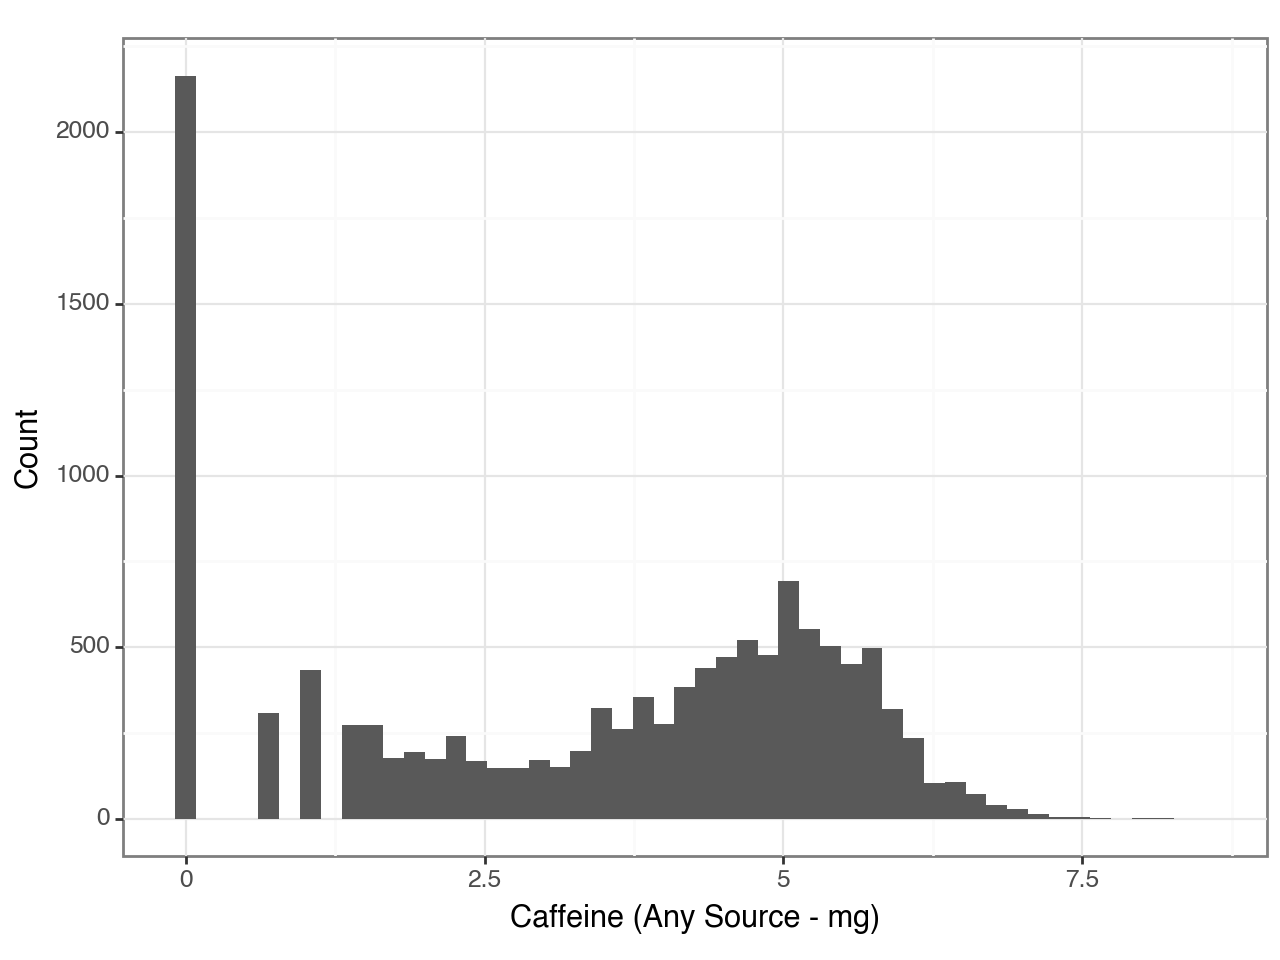

<Figure Size: (640 x 480)>

In [8]:
(
    ggplot(data=df, mapping=aes(x="any_caffeine_log"))
    + geom_histogram(bins=50)
    + theme_bw()
    + labs(y="Count", x="Caffeine (Any Source - mg)")
)

/var/folders/qk/w86hxqjx1sz7tb4pk4_gy8pm0000gn/T/ipykernel_61518/2058526884.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1268 rows containing missing values.


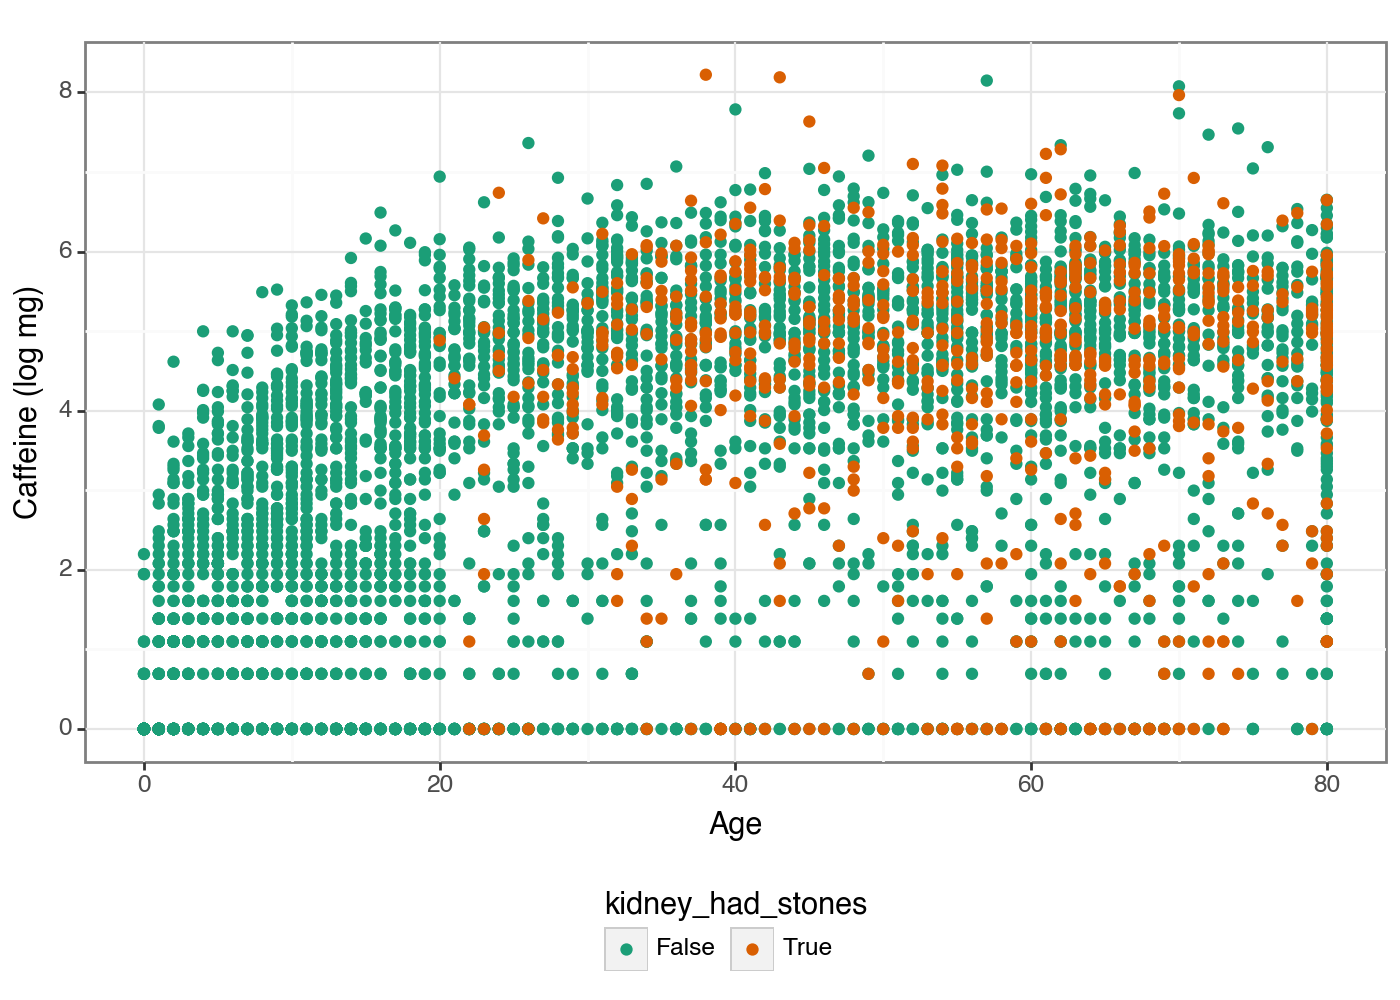

<Figure Size: (700 x 500)>

In [13]:
kidney_undersample = (
    df.groupby("kidney_had_stones")
    .apply(lambda x: x.sample(n=min(5500, len(x))))
    .droplevel(0)
)
(
    ggplot(
        data=kidney_undersample,
        mapping=aes(x="demo_age", y="any_caffeine_log", color="kidney_had_stones"),
    )
    + geom_point()
    + theme_bw()
    + theme(legend_position="bottom", figure_size=(7, 5))
    + labs(y="Caffeine (log mg)", x="Age")
    + scale_color_brewer(palette="Dark2", type="qual")
)

/Users/rachelhimmel/.pyenv/versions/3.9.12/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 59474 rows containing non-finite values.


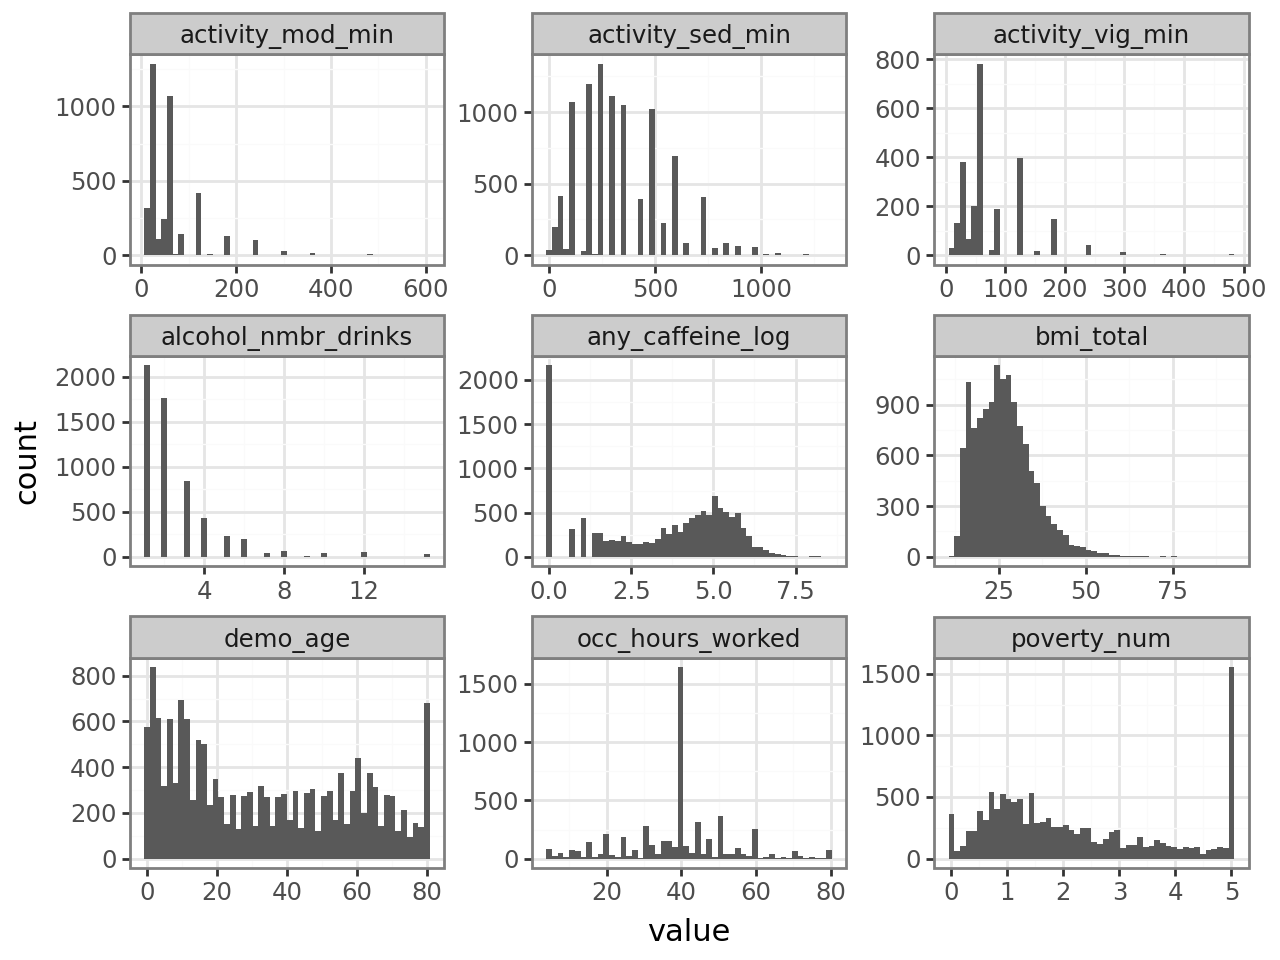

In [9]:
hist_vars = [
    "poverty_num",
    "activity_vig_min",
    "activity_mod_min",
    "activity_sed_min",
    "any_caffeine_log",
    "demo_age",
    "bmi_total",
    "occ_hours_worked",
    "alcohol_nmbr_drinks",
]
(
    ggplot(data=df[hist_vars].melt(), mapping=aes(x="value"))
    + facet_wrap("~variable", scales="free")
    + geom_histogram(bins=50)
    + theme_bw()
)

/Users/rachelhimmel/.pyenv/versions/3.9.12/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 59474 rows containing non-finite values.


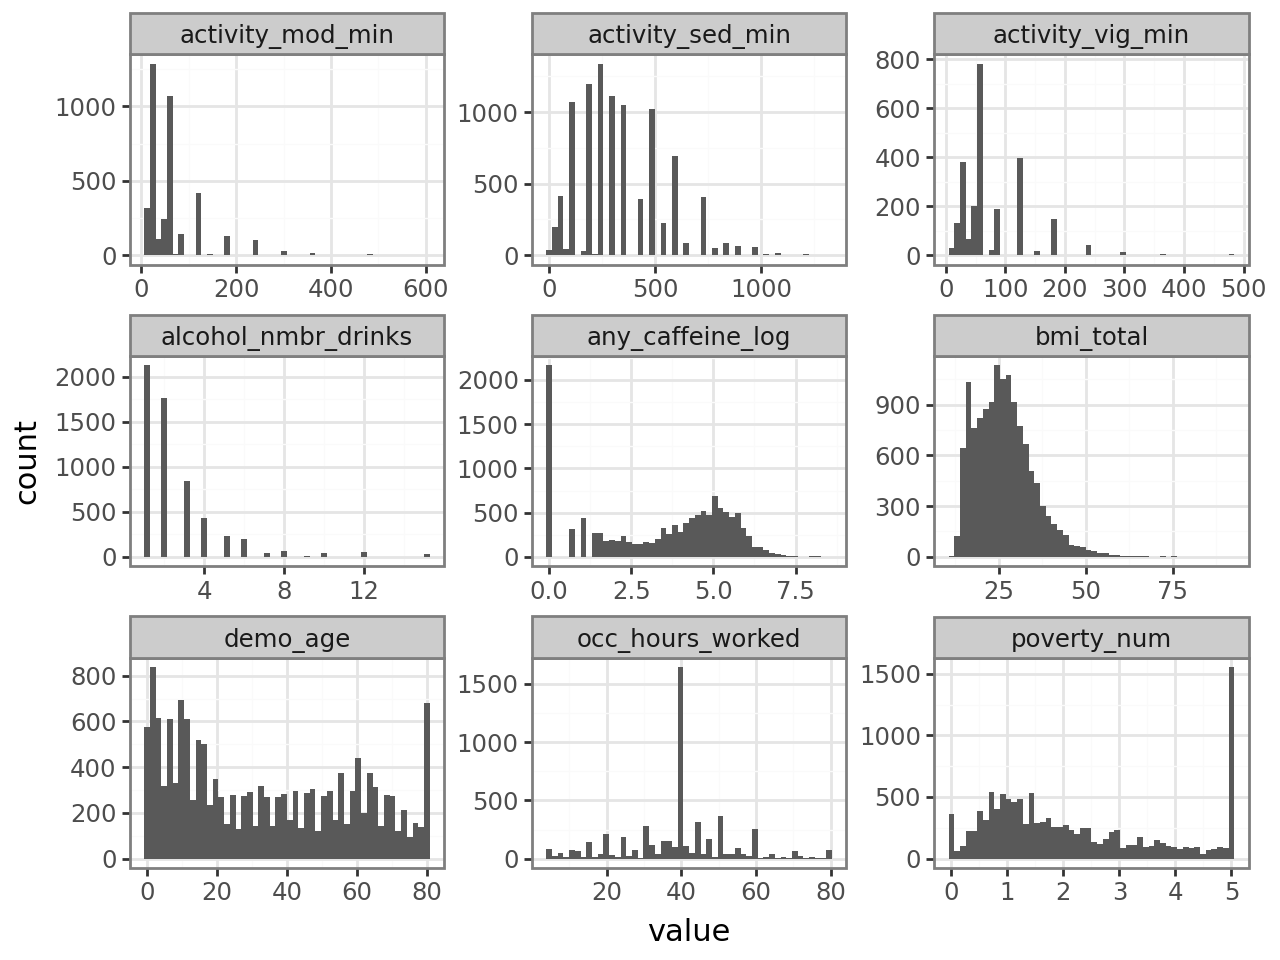

In [10]:
hist_vars = [
    "poverty_num",
    "activity_vig_min",
    "activity_mod_min",
    "activity_sed_min",
    "any_caffeine_log",
    "demo_age",
    "bmi_total",
    "occ_hours_worked",
    "alcohol_nmbr_drinks",
]
(
    ggplot(data=df[hist_vars].melt(), mapping=aes(x="value"))
    + facet_wrap("~variable", scales="free")
    + geom_histogram(bins=50)
    + theme_bw()
)

In [11]:
all_vars = hist_vars + ["any_caffeine_log", "demo_race", "demo_gender"]
df[all_vars].isna().sum() / df.shape[0]

poverty_num           0.21
activity_vig_min      0.84
activity_mod_min      0.75
activity_sed_min      0.38
any_caffeine_log      0.20
demo_age              0.00
bmi_total             0.16
occ_hours_worked      0.66
alcohol_nmbr_drinks   0.62
any_caffeine_log      0.20
demo_race             0.00
demo_gender           0.00
dtype: float64

In [12]:
df[["activity_vig_any", "activity_mod_any", "activity_sed_any"]] = (
    df[["activity_vig_min", "activity_mod_min", "activity_sed_min"]].fillna(0) > 0
)

/Users/rachelhimmel/.pyenv/versions/3.9.12/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 64825 rows containing missing values.


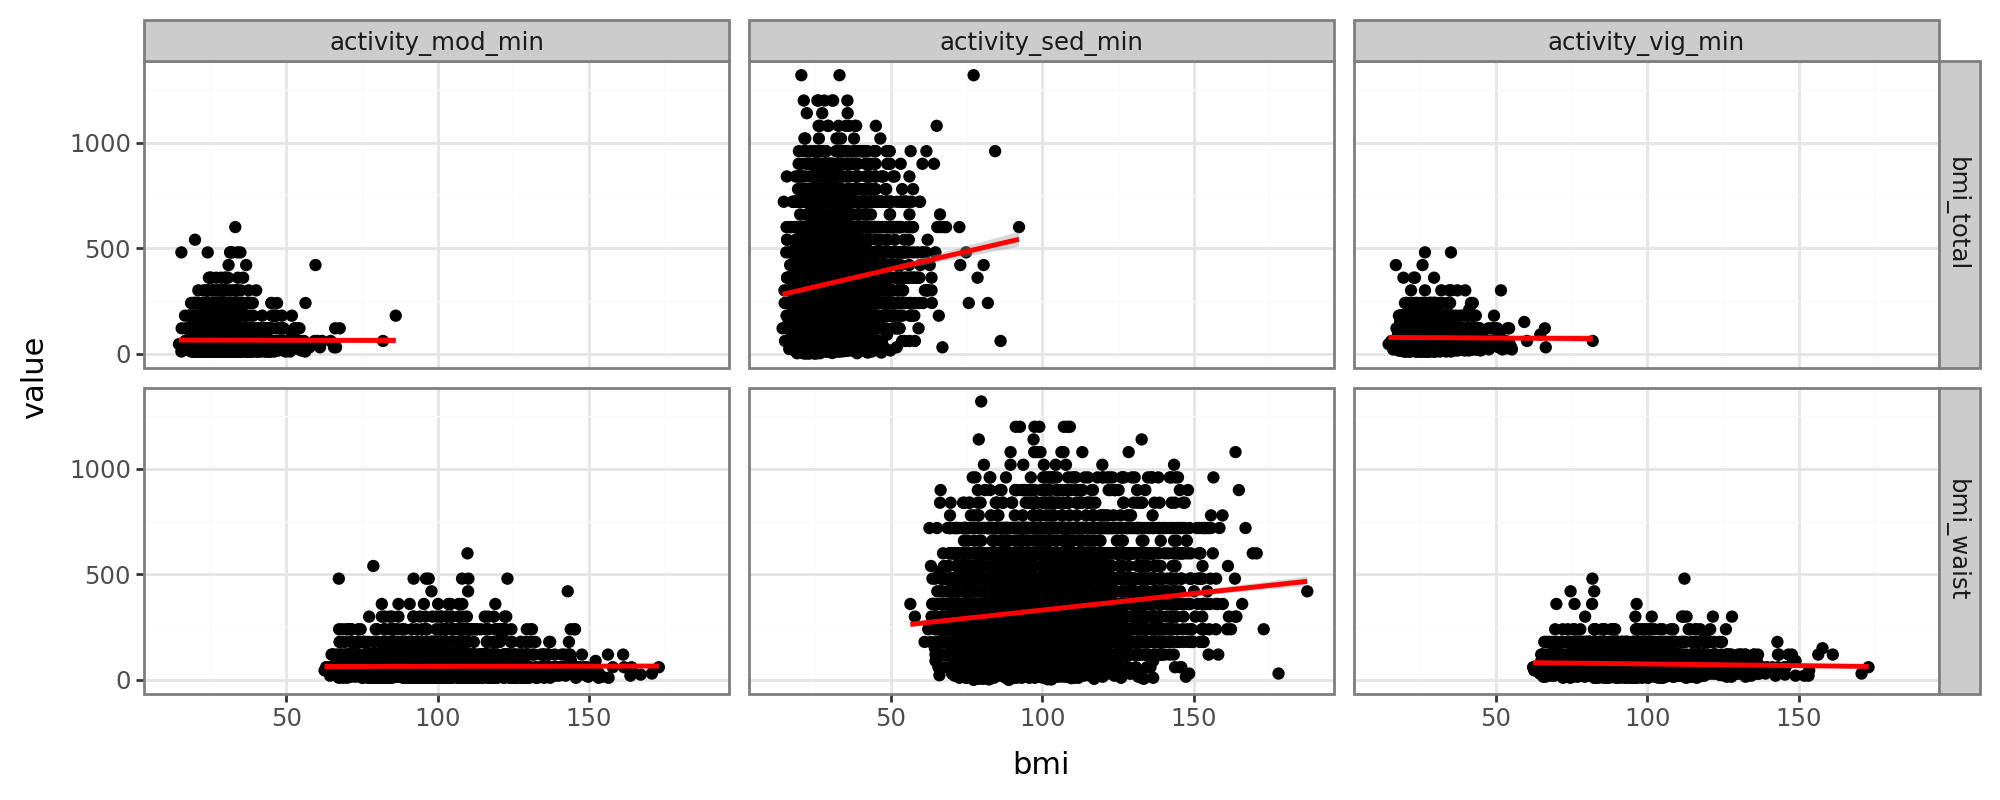

In [13]:
bmi_plot_df = (
    df[
        [
            "bmi_total",
            "bmi_waist",
            "activity_vig_min",
            "activity_mod_min",
            "activity_sed_min",
        ]
    ]
    .melt(id_vars=["bmi_waist", "bmi_total"])
    .melt(id_vars=["variable", "value"], value_name="bmi", var_name="measure")
)
(
    ggplot(
        data=bmi_plot_df,
        mapping=aes(x="bmi", y="value"),
    )
    + geom_point()
    + geom_smooth(color="red")
    + facet_grid("measure~variable", scales="free_y")
    + theme_bw()
    + theme(figure_size=(10, 4))
)

In [14]:
# Below section of EDA done with the cleaned dataset, prepared_data.csv
prepdf = pd.read_csv('../data/prepared_data.csv')

/Users/rachelhimmel/.pyenv/versions/3.9.12/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


Text(0.5, 0, 'Caffeine (Any Source - log(mg))')

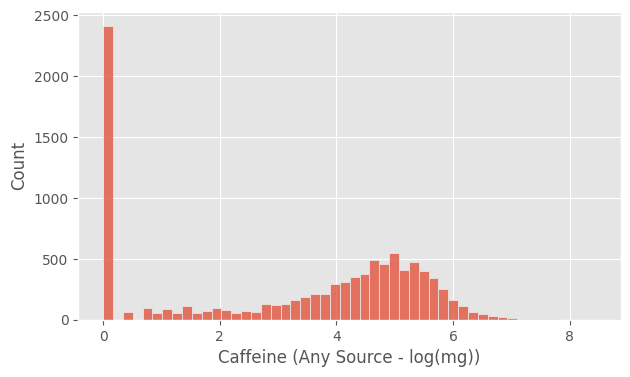

In [18]:
fig = plt.figure(figsize=(7,4))
g = sb.histplot(data = prepdf, x = 'passthrough__any_caffeine_log', bins = 50)
g.set_xlabel("Caffeine (Any Source - log(mg))")

Text(0.5, 0, 'Questionnaire - Kidney Related Variables')

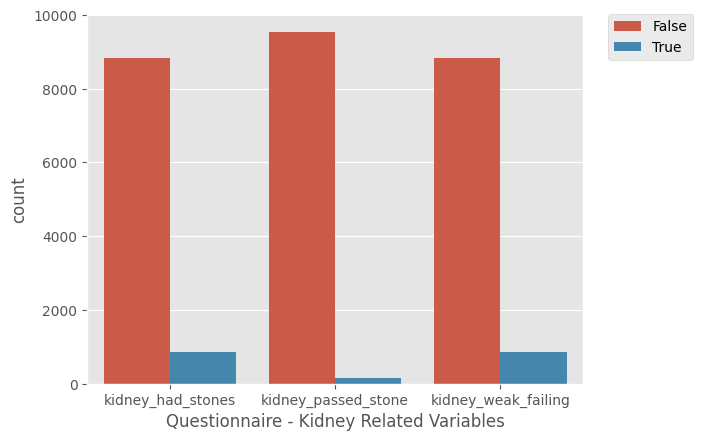

In [19]:
kc_df = prepdf[['kidney_had_stones', 'kidney_passed_stone', 'kidney_weak_failing']]
kc_df = kc_df.melt(ignore_index=False).reset_index()
kc_df['value'] = kc_df['value'].astype(str)
sb.countplot(data = kc_df, x = 'variable', hue = 'value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Questionnaire - Kidney Related Variables')

<Axes: xlabel='kidney_had_stones', ylabel='passthrough__any_caffeine'>

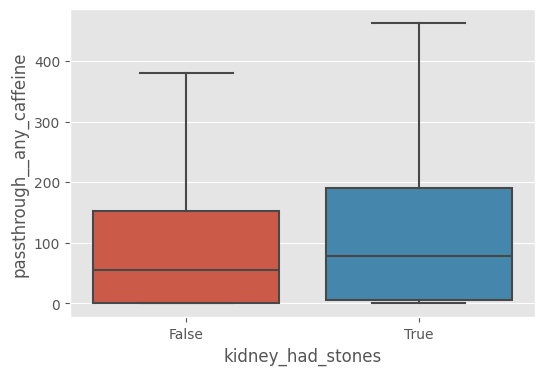

In [21]:
plt.figure(figsize=(6,4))
sb.boxplot(data = prepdf, x = 'kidney_had_stones', y = 'passthrough__any_caffeine', showfliers = False)

/Users/rachelhimmel/.pyenv/versions/3.9.12/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/rachelhimmel/.pyenv/versions/3.9.12/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


Text(0, 0.5, 'Caffeine Consumption – log(mg)')

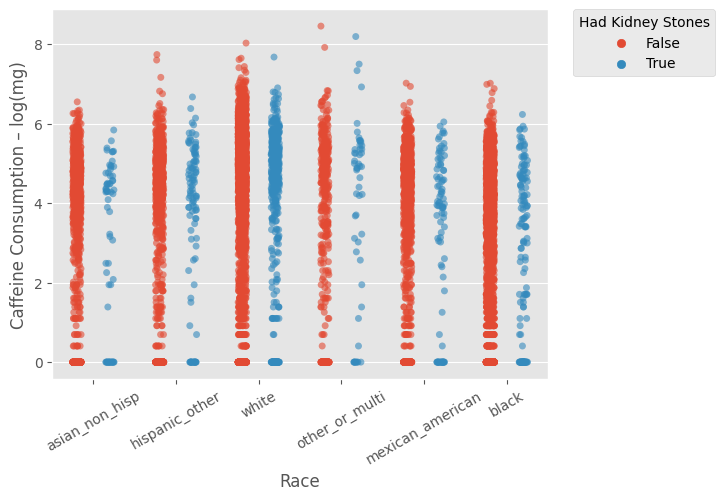

In [22]:
# more white people in the sample, and white people seem to consume more caffeine on avg
temp1 = prepdf.copy()
temp1['demo_race'] = temp1['demo_race'].replace(to_replace = [1.0, 2.0, 3.0, 4.0, 6.0, 7.0], 
                                                value=["mexican_american", "hispanic_other", "white", "black", "asian_non_hisp", "other_or_multi"])
g = sb.stripplot(data = temp1, x="demo_race", y = 'passthrough__any_caffeine_log', hue="kidney_had_stones", dodge=True, alpha = 0.6)
plt.legend(title = 'Had Kidney Stones', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=30)
plt.xlabel('Race')
plt.ylabel("Caffeine Consumption – log(mg)")

In [23]:
prepdf.groupby('demo_race')['kidney_had_stones'].sum()

demo_race
1.00     89
2.00    102
3.00    413
4.00    144
6.00     65
7.00     53
Name: kidney_had_stones, dtype: int64

In [24]:
temp = prepdf[prepdf['occ_work_shift'].isin([1.0, 2.0, 3.0, 5.0])]
temp_avgs = temp.groupby('occ_work_shift')['passthrough__any_caffeine_log'].mean()
temp_avgs

occ_work_shift
1.00   3.45
2.00   3.07
3.00   3.30
5.00   3.41
Name: passthrough__any_caffeine_log, dtype: float64

Text(0.5, 1.0, 'Variable Schedule')

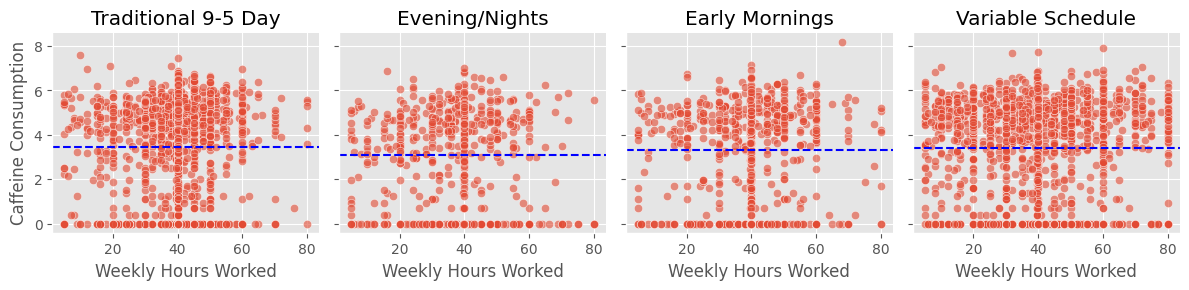

In [25]:
g = sb.FacetGrid(temp, col="occ_work_shift")
g.map(sb.scatterplot, 'static_impute__occ_hours_worked', 'passthrough__any_caffeine_log', alpha=.6)
g.set_xlabels(label = 'Weekly Hours Worked')
g.set_ylabels(label = 'Caffeine Consumption')
a1, a2, a3, a4 = g.axes[0]
a1.axhline(temp_avgs[1.0], ls='--', color = 'blue')
a2.axhline(temp_avgs[2.0], ls='--', color = 'blue')
a3.axhline(temp_avgs[3.0], ls='--', color = 'blue')
a4.axhline(temp_avgs[5.0], ls='--', color = 'blue')
a1.set_title('Traditional 9-5 Day')
a2.set_title('Evening/Nights')
a3.set_title('Early Mornings')
a4.set_title('Variable Schedule')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

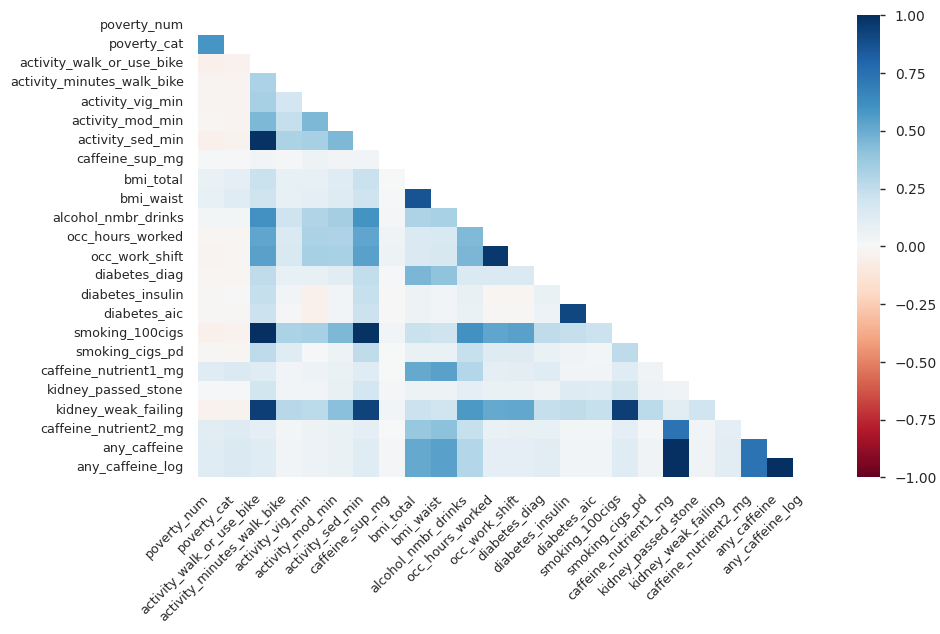

In [26]:
#using profilereport package in python for easy initial look at the data, correlation plot
profile = ProfileReport(df, title="NHANES Data Profile", sort = "ascending", interactions=None, samples=None, dark_mode=True)
profile